In [ ]:
import os
import numpy as np

subset_size = 10
# num_exps = 15
sc_options = ['False'] * 10

for sc_choice in sc_options:
    os.system(f"python main.py -model 'resnet50' -b 4 -bs 64 -s 1.16 -ds 'CIFAR100' -sn {subset_size} -sc '{sc_choice}'")

Quantization mode: GPFQ

Quantization hyperparameters:
Quantizing resnet50 on cpu with
	  dataset: CIFAR100, bits: 4, mlp_scalar: 1.16, cnn_scalar: 1.16, mlp_percentile: 1,         
	cnn_percentile: 1, retain_rate: 0.25, batch_size: 64

Files already downloaded and verified
Files already downloaded and verified
Layer indices to quantize [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]
Total number of layers to quantize 54

Quantizing layer with index: 0
Quantization progress: 0 out of 53

shape of W: torch.Size([64, 3, 7, 7])
shape of analog_layer_input: torch.Size([16448, 147])
shape of quantized_layer_input: torch.Size([16448, 147])
The number of groups: 1



100%|██████████| 147/147 [00:00<00:00, 617.96it/s]


The quantization error of layer 0 is 84.47268676757812.
The relative quantization error of layer 0 is 0.01921212300658226.


Quantizing layer with index: 1
Quantization progress: 1 out of 53

shape of W: torch.Size([64, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 160.28it/s]


The quantization error of layer 1 is 905.26806640625.
The relative quantization error of layer 1 is 0.05072573199868202.


Quantizing layer with index: 2
Quantization progress: 2 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 1045.52it/s]


The quantization error of layer 2 is 251.7594757080078.
The relative quantization error of layer 2 is 0.055826712399721146.


Quantizing layer with index: 3
Quantization progress: 3 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:03<00:00, 20.20it/s]


The quantization error of layer 3 is 3437.6201171875.
The relative quantization error of layer 3 is 0.10709679126739502.


Quantizing layer with index: 4
Quantization progress: 4 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:03<00:00, 19.44it/s]


The quantization error of layer 4 is 1481.3179931640625.
The relative quantization error of layer 4 is 0.050746090710163116.


Quantizing layer with index: 5
Quantization progress: 5 out of 53

shape of W: torch.Size([64, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:03<00:00, 67.19it/s]


The quantization error of layer 5 is 600.79736328125.
The relative quantization error of layer 5 is 0.2032676339149475.


Quantizing layer with index: 6
Quantization progress: 6 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 2874.38it/s]


The quantization error of layer 6 is 271.2516784667969.
The relative quantization error of layer 6 is 0.2242470681667328.


Quantizing layer with index: 7
Quantization progress: 7 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:01<00:00, 53.16it/s]


The quantization error of layer 7 is 1165.9117431640625.
The relative quantization error of layer 7 is 0.24130794405937195.


Quantizing layer with index: 8
Quantization progress: 8 out of 53

shape of W: torch.Size([64, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:01<00:00, 173.63it/s]


The quantization error of layer 8 is 902.3902587890625.
The relative quantization error of layer 8 is 0.26206088066101074.


Quantizing layer with index: 9
Quantization progress: 9 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 2880.37it/s]


The quantization error of layer 9 is 569.5308837890625.
The relative quantization error of layer 9 is 0.26820990443229675.


Quantizing layer with index: 10
Quantization progress: 10 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:01<00:00, 53.71it/s]


The quantization error of layer 10 is 1634.457275390625.
The relative quantization error of layer 10 is 0.2315034121274948.


Quantizing layer with index: 11
Quantization progress: 11 out of 53

shape of W: torch.Size([128, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:03<00:00, 83.25it/s]


The quantization error of layer 11 is 1732.3165283203125.
The relative quantization error of layer 11 is 0.30983486771583557.


Quantizing layer with index: 12
Quantization progress: 12 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([5824, 1152])
shape of quantized_layer_input: torch.Size([5824, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:02<00:00, 487.97it/s]


The quantization error of layer 12 is 1214.247314453125.
The relative quantization error of layer 12 is 0.29474014043807983.


Quantizing layer with index: 13
Quantization progress: 13 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:02<00:00, 44.62it/s]


The quantization error of layer 13 is 1541.043212890625.
The relative quantization error of layer 13 is 0.2209736853837967.


Quantizing layer with index: 14
Quantization progress: 14 out of 53

shape of W: torch.Size([512, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:30<00:00,  8.42it/s]


The quantization error of layer 14 is 2121.232666015625.
The relative quantization error of layer 14 is 0.29761186242103577.


Quantizing layer with index: 15
Quantization progress: 15 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:03<00:00, 151.30it/s]


The quantization error of layer 15 is 2042.0806884765625.
The relative quantization error of layer 15 is 0.27470090985298157.


Quantizing layer with index: 16
Quantization progress: 16 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 1963.15it/s]


The quantization error of layer 16 is 553.20751953125.
The relative quantization error of layer 16 is 0.24985921382904053.


Quantizing layer with index: 17
Quantization progress: 17 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:02<00:00, 46.26it/s]


The quantization error of layer 17 is 1204.5223388671875.
The relative quantization error of layer 17 is 0.4014008045196533.


Quantizing layer with index: 18
Quantization progress: 18 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:03<00:00, 153.60it/s]


The quantization error of layer 18 is 1821.4642333984375.
The relative quantization error of layer 18 is 0.3020702302455902.


Quantizing layer with index: 19
Quantization progress: 19 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 1997.65it/s]


The quantization error of layer 19 is 369.018798828125.
The relative quantization error of layer 19 is 0.25887736678123474.


Quantizing layer with index: 20
Quantization progress: 20 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:02<00:00, 47.45it/s]


The quantization error of layer 20 is 1284.4095458984375.
The relative quantization error of layer 20 is 0.3105056881904602.


Quantizing layer with index: 21
Quantization progress: 21 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:05<00:00, 99.37it/s] 


The quantization error of layer 21 is 1963.959716796875.
The relative quantization error of layer 21 is 0.33246490359306335.


Quantizing layer with index: 22
Quantization progress: 22 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 1621.41it/s]


The quantization error of layer 22 is 469.4042053222656.
The relative quantization error of layer 22 is 0.27827540040016174.


Quantizing layer with index: 23
Quantization progress: 23 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:05<00:00, 22.45it/s]


The quantization error of layer 23 is 1009.5878295898438.
The relative quantization error of layer 23 is 0.37842071056365967.


Quantizing layer with index: 24
Quantization progress: 24 out of 53

shape of W: torch.Size([256, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:08<00:00, 60.64it/s]


The quantization error of layer 24 is 3389.322998046875.
The relative quantization error of layer 24 is 0.36641836166381836.


Quantizing layer with index: 25
Quantization progress: 25 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([1664, 2304])
shape of quantized_layer_input: torch.Size([1664, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:02<00:00, 779.58it/s]


The quantization error of layer 25 is 626.10888671875.
The relative quantization error of layer 25 is 0.3211418390274048.


Quantizing layer with index: 26
Quantization progress: 26 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:02<00:00, 108.80it/s]


The quantization error of layer 26 is 1368.9730224609375.
The relative quantization error of layer 26 is 0.37305423617362976.


Quantizing layer with index: 27
Quantization progress: 27 out of 53

shape of W: torch.Size([1024, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:32<00:00, 15.91it/s]


The quantization error of layer 27 is 3497.114501953125.
The relative quantization error of layer 27 is 0.3437979817390442.


Quantizing layer with index: 28
Quantization progress: 28 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:03<00:00, 279.91it/s]


The quantization error of layer 28 is 1350.84423828125.
The relative quantization error of layer 28 is 0.3185875713825226.


Quantizing layer with index: 29
Quantization progress: 29 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



  3%|▎         | 8/256 [00:00<00:03, 72.66it/s]

The quantization error of layer 29 is 269.0473937988281.
The relative quantization error of layer 29 is 0.18103158473968506.


Quantizing layer with index: 30
Quantization progress: 30 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:02<00:00, 86.63it/s] 


The quantization error of layer 30 is 946.7935180664062.
The relative quantization error of layer 30 is 0.4298103153705597.


Quantizing layer with index: 31
Quantization progress: 31 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:03<00:00, 287.69it/s]


The quantization error of layer 31 is 1522.1629638671875.
The relative quantization error of layer 31 is 0.3539365231990814.


Quantizing layer with index: 32
Quantization progress: 32 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2522.30it/s]


The quantization error of layer 32 is 295.6661071777344.
The relative quantization error of layer 32 is 0.2175946831703186.


Quantizing layer with index: 33
Quantization progress: 33 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:02<00:00, 112.11it/s]


The quantization error of layer 33 is 862.1682739257812.
The relative quantization error of layer 33 is 0.45864301919937134.


Quantizing layer with index: 34
Quantization progress: 34 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:03<00:00, 270.18it/s]


The quantization error of layer 34 is 1654.6414794921875.
The relative quantization error of layer 34 is 0.3818419277667999.


Quantizing layer with index: 35
Quantization progress: 35 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 3295.41it/s]


The quantization error of layer 35 is 251.3138427734375.
The relative quantization error of layer 35 is 0.2094840705394745.


Quantizing layer with index: 36
Quantization progress: 36 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:02<00:00, 109.08it/s]


The quantization error of layer 36 is 1066.3203125.
The relative quantization error of layer 36 is 0.5002076625823975.


Quantizing layer with index: 37
Quantization progress: 37 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:03<00:00, 292.37it/s]


The quantization error of layer 37 is 1768.0743408203125.
The relative quantization error of layer 37 is 0.4198465645313263.


Quantizing layer with index: 38
Quantization progress: 38 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 3141.27it/s]


The quantization error of layer 38 is 201.72694396972656.
The relative quantization error of layer 38 is 0.2039148509502411.


Quantizing layer with index: 39
Quantization progress: 39 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:02<00:00, 85.95it/s] 


The quantization error of layer 39 is 1379.6441650390625.
The relative quantization error of layer 39 is 0.5126256942749023.


Quantizing layer with index: 40
Quantization progress: 40 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:04<00:00, 222.17it/s]


The quantization error of layer 40 is 1825.459228515625.
The relative quantization error of layer 40 is 0.4246731996536255.


Quantizing layer with index: 41
Quantization progress: 41 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 3258.56it/s]


The quantization error of layer 41 is 179.1639862060547.
The relative quantization error of layer 41 is 0.21659980714321136.


Quantizing layer with index: 42
Quantization progress: 42 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:04<00:00, 60.42it/s]


The quantization error of layer 42 is 1411.3270263671875.
The relative quantization error of layer 42 is 0.5136300921440125.


Quantizing layer with index: 43
Quantization progress: 43 out of 53

shape of W: torch.Size([512, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:07<00:00, 133.68it/s]


The quantization error of layer 43 is 2527.686279296875.
The relative quantization error of layer 43 is 0.45246458053588867.


Quantizing layer with index: 44
Quantization progress: 44 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([448, 4608])
shape of quantized_layer_input: torch.Size([448, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:03<00:00, 1458.28it/s]


The quantization error of layer 44 is 157.04051208496094.
The relative quantization error of layer 44 is 0.1989416927099228.


Quantizing layer with index: 45
Quantization progress: 45 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:02<00:00, 226.04it/s]


The quantization error of layer 45 is 896.5408935546875.
The relative quantization error of layer 45 is 0.40731802582740784.


Quantizing layer with index: 46
Quantization progress: 46 out of 53

shape of W: torch.Size([2048, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:37<00:00, 27.24it/s]


The quantization error of layer 46 is 2194.84130859375.
The relative quantization error of layer 46 is 0.46198657155036926.


Quantizing layer with index: 47
Quantization progress: 47 out of 53

shape of W: torch.Size([512, 2048, 1, 1])
shape of analog_layer_input: torch.Size([832, 2048])
shape of quantized_layer_input: torch.Size([832, 2048])
The number of groups: 1



100%|██████████| 2048/2048 [00:03<00:00, 608.42it/s]


The quantization error of layer 47 is 400.73944091796875.
The relative quantization error of layer 47 is 0.3841008245944977.


Quantizing layer with index: 48
Quantization progress: 48 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([192, 4608])
shape of quantized_layer_input: torch.Size([192, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:01<00:00, 2557.24it/s]


The quantization error of layer 48 is 104.94970703125.
The relative quantization error of layer 48 is 0.1016913503408432.


Quantizing layer with index: 49
Quantization progress: 49 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:02<00:00, 220.59it/s]


The quantization error of layer 49 is 514.6678466796875.
The relative quantization error of layer 49 is 0.6350284218788147.


Quantizing layer with index: 50
Quantization progress: 50 out of 53

shape of W: torch.Size([512, 2048, 1, 1])
shape of analog_layer_input: torch.Size([832, 2048])
shape of quantized_layer_input: torch.Size([832, 2048])
The number of groups: 1



100%|██████████| 2048/2048 [00:04<00:00, 422.00it/s]


The quantization error of layer 50 is 431.8699951171875.
The relative quantization error of layer 50 is 0.2677358090877533.


Quantizing layer with index: 51
Quantization progress: 51 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([192, 4608])
shape of quantized_layer_input: torch.Size([192, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:01<00:00, 2592.84it/s]


The quantization error of layer 51 is 51.44135665893555.
The relative quantization error of layer 51 is 0.09529919177293777.


Quantizing layer with index: 52
Quantization progress: 52 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:02<00:00, 191.40it/s]


The quantization error of layer 52 is 105.16881561279297.
The relative quantization error of layer 52 is 0.7643975615501404.


Quantizing layer with index: 53
Quantization progress: 53 out of 53

The number of groups: 1



100%|██████████| 2048/2048 [00:00<00:00, 8458.12it/s]


The quantization error of layer 53 is 25.470434188842773.
The relative quantization error of layer 53 is 0.16257630288600922.


Time used for quantization: 0:18:39.026546


Evaluting the original model to get its accuracy



  0%|          | 0/16 [00:00<?, ?it/s]

Top-1 accuracy of resnet50 is 0.881.
Top-5 accuracy of resnet50 is 0.986.

 Evaluting the quantized model to get its accuracy



 75%|███████▌  | 12/16 [03:32<01:08, 17.09s/it]

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../logs/Quantization_Log_Subsets.csv")

df

,Model Name,Dataset,Quantization Batch Size,Original Top1 Accuracy,Quantized Top1 Accuracy,Original Top5 Accuracy,Quantized Top5 Accuracy,Bits,MLP_Alphabet_Scalar,CNN_Alphabet_Scalar,...,Quantized Sparsity,Retain_rate,Fusion,Seed,Subset_Inds,Subset_Classes,Max_KL,Min_KL,Avg_KL,Classes Repeated
0,resnet50,CIFAR100,64,0.815000,0.603000,0.949000,0.917000,4,1.16,1.16,...,0.4454,0.25,False,0,"[7, 44, 77, 45, 79, 50, 51, 18, 26, 29]","[np.str_('beetle'), np.str_('lizard'), np.str_...",0.969446,0.091850,0.369210,False
1,resnet50,CIFAR100,64,0.828889,0.848889,0.967778,0.970000,4,1.16,1.16,...,0.4474,0.25,False,0,"[np.int64(44), np.int64(47), np.int64(64), np....","['lizard', 'maple_tree', 'possum', 'ray', 'ray...",44.511445,0.000000,12.637726,True
2,resnet50,CIFAR100,64,0.863000,0.843000,0.983000,0.989000,4,1.16,1.16,...,0.4504,0.25,False,0,"[0, 71, 39, 44, 49, 52, 53, 58, 61, 94]","['apple', 'sea', 'keyboard', 'lizard', 'mounta...",192.253176,0.544018,66.416617,False
3,resnet50,CIFAR100,64,0.799000,0.615000,0.951000,0.911000,4,1.16,1.16,...,0.4483,0.25,False,0,"[64, 65, 66, 3, 4, 38, 15, 80, 19, 63]","['possum', 'rabbit', 'raccoon', 'bear', 'beave...",1.338502,0.109146,0.578157,False
4,resnet50,CIFAR100,64,0.887000,0.944000,0.988000,0.995000,4,1.16,1.16,...,0.4543,0.25,False,0,"[0, 69, 39, 49, 52, 53, 20, 62, 58, 94]","['apple', 'rocket', 'keyboard', 'mountain', 'o...",192.253176,0.844140,69.558004,False
5,resnet50,CIFAR100,64,0.797000,0.830000,0.973000,0.974000,4,1.16,1.16,...,0.4480,0.25,False,0,"[np.int64(89), np.int64(73), np.int64(85), np....","['tractor', 'shark', 'tank', 'mouse', 'castle'...",58.464503,0.218817,14.820982,False
6,resnet50,CIFAR100,64,0.830000,0.737000,0.968000,0.955000,4,1.16,1.16,...,0.4464,0.25,False,0,"[np.int64(6), np.int64(18), np.int64(19), np.i...","['bee', 'caterpillar', 'cattle', 'woman', 'sha...",40.082360,0.155198,8.848314,False
7,resnet50,CIFAR100,64,0.794444,0.776667,0.966667,0.983333,4,1.16,1.16,...,0.4539,0.25,False,0,"[np.int64(59), np.int64(90), np.int64(69), np....","['pine_tree', 'train', 'rocket', 'table', 'mot...",50.340385,0.000000,8.589799,True
8,resnet50,CIFAR100,64,0.767000,0.693000,0.961000,0.975000,4,1.16,1.16,...,0.4510,0.25,False,0,"[96, 33, 68, 27, 72, 75, 47, 55, 56, 59]","['willow_tree', 'forest', 'road', 'crocodile',...",7.107001,0.074397,1.950773,False
9,resnet50,CIFAR100,64,0.867000,0.946000,0.986000,0.995000,4,1.16,1.16,...,0.4540,0.25,False,0,"[0, 58, 39, 71, 49, 52, 53, 26, 61, 94]","['apple', 'pickup_truck', 'keyboard', 'sea', '...",192.253176,0.544018,66.299283,False


In [12]:
from matplotlib import colormaps

cmap = colormaps['rainbow']
cmap(2.5)

(np.float64(1.0),
 np.float64(1.2246467991473532e-16),
 np.float64(6.123233995736766e-17),
 np.float64(1.0))

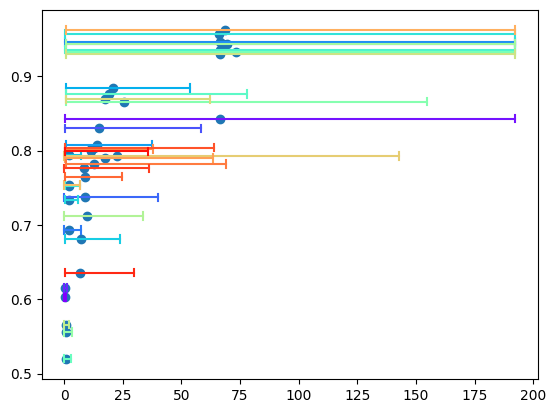

In [13]:
from matplotlib import colormaps

for i in range(df.shape[0]):
    plt.plot(df.iloc[i][["Min_KL", "Max_KL"]], [df.iloc[i]["Quantized Top1 Accuracy"]] * 2, color = cmap(i / df.shape[0]))
    plt.plot([df.iloc[i]["Min_KL"]] * 2, [df.iloc[i]["Quantized Top1 Accuracy"] - 0.005, df.iloc[i]["Quantized Top1 Accuracy"] + 0.005], color = cmap(i / df.shape[0]))
    plt.plot([df.iloc[i]["Max_KL"]] * 2, [df.iloc[i]["Quantized Top1 Accuracy"] - 0.005, df.iloc[i]["Quantized Top1 Accuracy"] + 0.005], color = cmap(i / df.shape[0]))

plt.scatter(df["Avg_KL"], df["Quantized Top1 Accuracy"])

In [5]:
df = df[df["Classes Repeated"] == False]

In [29]:
import numpy as np
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return (a * np.log(b * x)) + c

X, y = df["Avg_KL"], df["Quantized Top1 Accuracy"]

coefs, pcov = curve_fit(func, X, y)

fitted_line_1 = []
for i in range(100):
    fitted_line_1 += [func(i, *coefs).item()]

/var/folders/ty/7dl6wg8j4039_df2sf3y5k_w0000gn/T/ipykernel_42802/3828107680.py:5: RuntimeWarning: divide by zero encountered in log
  return (a * np.log(b * x)) + c


In [30]:
X, y = df["Avg_KL"], df["Original Top1 Accuracy"]

coefs, pcov = curve_fit(func, X, y)

fitted_line_5 = []
for i in range(100):
    fitted_line_5 += [func(i, *coefs).item()]

/var/folders/ty/7dl6wg8j4039_df2sf3y5k_w0000gn/T/ipykernel_42802/3828107680.py:5: RuntimeWarning: divide by zero encountered in log
  return (a * np.log(b * x)) + c


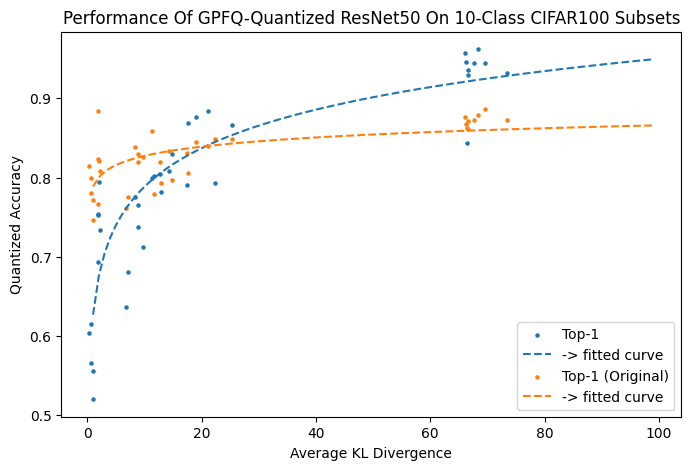

In [31]:
plt.figure(figsize = (8, 5))
plt.scatter(df["Avg_KL"], df["Quantized Top1 Accuracy"], s = 5)
plt.plot(range(len(fitted_line_1)), fitted_line_1, '--')
plt.scatter(df["Avg_KL"], df["Original Top1 Accuracy"], s = 5)
plt.plot(range(len(fitted_line_5)), fitted_line_5, '--')
plt.xlabel("Average KL Divergence")
plt.ylabel("Quantized Accuracy")
plt.title("Performance Of GPFQ-Quantized ResNet50 On 10-Class CIFAR100 Subsets", fontsize = 12)
leg = plt.legend(["Top-1", "-> fitted curve", "Top-1 (Original)", "-> fitted curve"])
plt.savefig("./imgs/resnet50.png")

In [32]:
import numpy as np
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return (a * np.log(b * x)) + c

X, y = df["Median_KL"], df["Quantized Top1 Accuracy"]

coefs, pcov = curve_fit(func, X, y)

fitted_line_1 = []
for i in range(100):
    fitted_line_1 += [func(i, *coefs).item()]

/var/folders/ty/7dl6wg8j4039_df2sf3y5k_w0000gn/T/ipykernel_42802/710862466.py:5: RuntimeWarning: divide by zero encountered in log
  return (a * np.log(b * x)) + c


In [33]:
X, y = df["Median_KL"], df["Original Top1 Accuracy"]

coefs, pcov = curve_fit(func, X, y)

fitted_line_5 = []
for i in range(100):
    fitted_line_5 += [func(i, *coefs).item()]

/var/folders/ty/7dl6wg8j4039_df2sf3y5k_w0000gn/T/ipykernel_42802/710862466.py:5: RuntimeWarning: divide by zero encountered in log
  return (a * np.log(b * x)) + c


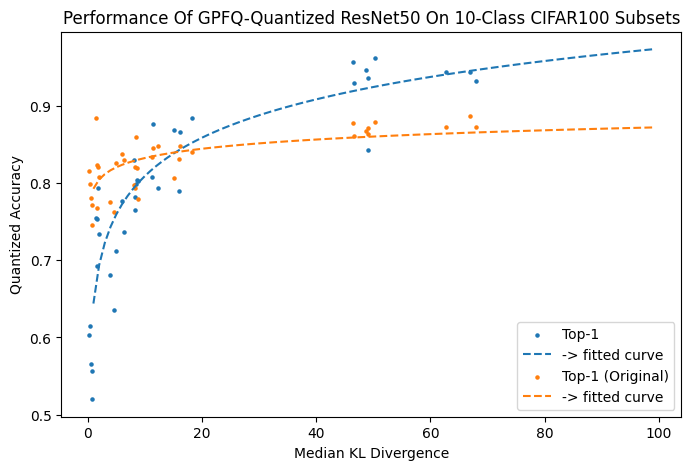

In [34]:
plt.figure(figsize = (8, 5))
plt.scatter(df["Median_KL"], df["Quantized Top1 Accuracy"], s = 5)
plt.plot(range(len(fitted_line_1)), fitted_line_1, '--')
plt.scatter(df["Median_KL"], df["Original Top1 Accuracy"], s = 5)
plt.plot(range(len(fitted_line_5)), fitted_line_5, '--')
plt.xlabel("Median KL Divergence")
plt.ylabel("Quantized Accuracy")
plt.title("Performance Of GPFQ-Quantized ResNet50 On 10-Class CIFAR100 Subsets", fontsize = 12)
leg = plt.legend(["Top-1", "-> fitted curve", "Top-1 (Original)", "-> fitted curve"])
plt.savefig("./imgs/resnet50_median.png")

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../logs/Quantization_Log_Subsets.csv")

df

,Model Name,Dataset,Quantization Batch Size,Original Top1 Accuracy,Quantized Top1 Accuracy,Original Top5 Accuracy,Quantized Top5 Accuracy,Bits,MLP_Alphabet_Scalar,CNN_Alphabet_Scalar,...,Original Sparsity,Quantized Sparsity,Retain_rate,Fusion,Seed,Subset_Inds,Subset_Classes,Max_KL,Min_KL,Avg_KL
0,resnet50,CIFAR100,64,0.8262,0.603000,0.9673,0.917000,4,1.16,1.16,...,0.0,0.4454,0.25,False,0,"[7, 44, 77, 45, 79, 50, 51, 18, 26, 29]","[np.str_('beetle'), np.str_('lizard'), np.str_...",0.969446,0.091850,0.369210
1,resnet50,CIFAR100,64,0.8262,0.848889,0.9673,0.970000,4,1.16,1.16,...,0.0,0.4474,0.25,False,0,"[np.int64(44), np.int64(47), np.int64(64), np....","['lizard', 'maple_tree', 'possum', 'ray', 'ray...",44.511445,0.000000,12.637726
2,resnet50,CIFAR100,64,0.8262,0.843000,0.9673,0.989000,4,1.16,1.16,...,0.0,0.4504,0.25,False,0,"[0, 71, 39, 44, 49, 52, 53, 58, 61, 94]","['apple', 'sea', 'keyboard', 'lizard', 'mounta...",192.253176,0.544018,66.416617
3,resnet50,CIFAR100,64,0.8262,0.615000,0.9673,0.911000,4,1.16,1.16,...,0.0,0.4483,0.25,False,0,"[64, 65, 66, 3, 4, 38, 15, 80, 19, 63]","['possum', 'rabbit', 'raccoon', 'bear', 'beave...",1.338502,0.109146,0.578157
4,resnet50,CIFAR100,64,0.8262,0.944000,0.9673,0.995000,4,1.16,1.16,...,0.0,0.4543,0.25,False,0,"[0, 69, 39, 49, 52, 53, 20, 62, 58, 94]","['apple', 'rocket', 'keyboard', 'mountain', 'o...",192.253176,0.844140,69.558004
5,resnet50,CIFAR100,64,0.8262,0.830000,0.9673,0.974000,4,1.16,1.16,...,0.0,0.4480,0.25,False,0,"[np.int64(89), np.int64(73), np.int64(85), np....","['tractor', 'shark', 'tank', 'mouse', 'castle'...",58.464503,0.218817,14.820982
6,resnet50,CIFAR100,64,0.8262,0.737000,0.9673,0.955000,4,1.16,1.16,...,0.0,0.4464,0.25,False,0,"[np.int64(6), np.int64(18), np.int64(19), np.i...","['bee', 'caterpillar', 'cattle', 'woman', 'sha...",40.082360,0.155198,8.848314
7,resnet50,CIFAR100,64,0.8262,0.776667,0.9673,0.983333,4,1.16,1.16,...,0.0,0.4539,0.25,False,0,"[np.int64(59), np.int64(90), np.int64(69), np....","['pine_tree', 'train', 'rocket', 'table', 'mot...",50.340385,0.000000,8.589799
8,resnet50,CIFAR100,64,0.8262,0.693000,0.9673,0.975000,4,1.16,1.16,...,0.0,0.4510,0.25,False,0,"[96, 33, 68, 27, 72, 75, 47, 55, 56, 59]","['willow_tree', 'forest', 'road', 'crocodile',...",7.107001,0.074397,1.950773
9,resnet50,CIFAR100,64,0.8262,0.946000,0.9673,0.995000,4,1.16,1.16,...,0.0,0.4540,0.25,False,0,"[0, 58, 39, 71, 49, 52, 53, 26, 61, 94]","['apple', 'pickup_truck', 'keyboard', 'sea', '...",192.253176,0.544018,66.299283


In [51]:
import timm
from data_loaders import data_loader
from utils import test_accuracy, eval_sparsity, fusion_layers_inplace, get_all_layers
import numpy as np
import torch
import re
from tqdm import tqdm

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
batch_size = 64

model = timm.create_model("hf_hub:anonauthors/cifar100-timm-resnet50", pretrained=True)
model.to(device)  
model.eval() 

topk = (1, 5)   # top-1 and top-5 accuracy

# acc_items = []
# for i in range(df.shape[0]):
#     subset_stage = df.iloc[i]["Subset_Inds"]
#     subset_stage = list(map(lambda x: int(x), re.findall(r"[0-9]+", subset_stage)))
#     if len(subset_stage) > 10:
#         subset_stage = subset_stage[1:][::2]
#     subset = []
#     for j in range(len(subset_stage)):
#         try:
#             subset += [subset_stage[j].item()]
#         except:
#             subset += [subset_stage[j]]
train_loader, test_loader = data_loader("CIFAR100", batch_size, 1)
# original_topk_accuracy = test_accuracy(model, test_loader, device, topk)

maxk = max(topk)
topk_count = np.zeros((len(topk), len(test_loader)))
correct_mat = []
for j, (x_test, target) in enumerate(tqdm(test_loader)):
    with torch.no_grad():
        y_pred = model(x_test.to(device))
    topk_pred = torch.topk(y_pred, maxk, dim=1).indices
    target = target.to(device).view(-1, 1).expand_as(topk_pred)
    correct_mat += [(target == topk_pred)]


# break    
# acc_items += [original_topk_accuracy]

# df.iloc[i, 4] = original_topk_accuracy[0]
# df.iloc[i, 6] = original_topk_accuracy[1]
# df.to_csv("../logs/Quantization_Log_Subsets.csv", index = False)

# print(df.iloc[i]["Subset_Classes"], original_topk_accuracy)



Files already downloaded and verified
Files already downloaded and verified


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 157/157 [43:06<00:00, 16.48s/it]


In [54]:
correct_mat[:5]

[tensor([[False, False, False, False, False],
         [ True, False, False, False, False],
         [False, False,  True, False, False],
         [ True, False, False, False, False],
         [ True, False, False, False, False],
         [False, False, False, False, False],
         [ True, False, False, False, False],
         [False, False, False, False, False],
         [False,  True, False, False, False],
         [ True, False, False, False, False],
         [ True, False, False, False, False],
         [ True, False, False, False, False],
         [ True, False, False, False, False],
         [ True, False, False, False, False],
         [ True, False, False, False, False],
         [ True, False, False, False, False],
         [ True, False, False, False, False],
         [ True, False, False, False, False],
         [ True, False, False, False, False],
         [ True, False, False, False, False],
         [ True, False, False, False, False],
         [ True, False, False, Fal

In [58]:
correct_mat_1 = torch.vstack(correct_mat)

In [61]:
classes = []
for j, (x_test, target) in enumerate(tqdm(test_loader)):
    classes += [target]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 157/157 [00:19<00:00,  8.17it/s]


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (157,) + inhomogeneous part.

In [69]:
classes = torch.cat(classes).numpy()

In [70]:
def get_topk(correct_mat, classes, subset, topk = (1, 5)):
    topk_count = []
    filtered = correct_mat[np.isin(classes, subset)]
    for i, k in enumerate(topk):
        topk_count += [filtered[:, :k].reshape(-1).sum().item()]
    return np.array(topk_count) / filtered.shape[0]

acc_items = []
for i in range(df.shape[0]):
    subset_stage = df.iloc[i]["Subset_Inds"]
    subset_stage = list(map(lambda x: int(x), re.findall(r"[0-9]+", subset_stage)))
    if len(subset_stage) > 10:
        subset_stage = subset_stage[1:][::2]
    subset = []
    for j in range(len(subset_stage)):
        try:
            subset += [subset_stage[j].item()]
        except:
            subset += [subset_stage[j]]
    
    acc_items += [get_topk(correct_mat_1.numpy(), classes, subset)]

acc_items

[array([0.815, 0.949]),
 array([0.82888889, 0.96777778]),
 array([0.863, 0.983]),
 array([0.799, 0.951]),
 array([0.887, 0.988]),
 array([0.797, 0.973]),
 array([0.83 , 0.968]),
 array([0.79444444, 0.96666667]),
 array([0.767, 0.961]),
 array([0.867, 0.986]),
 array([0.834, 0.968]),
 array([0.84 , 0.974]),
 array([0.821, 0.968]),
 array([0.775, 0.964]),
 array([0.85  , 0.9675]),
 array([0.808, 0.986]),
 array([0.877, 0.988]),
 array([0.86444444, 0.97333333]),
 array([0.81555556, 0.96444444]),
 array([0.823, 0.963]),
 array([0.871, 0.988]),
 array([0.81125, 0.95375]),
 array([0.845, 0.972]),
 array([0.746, 0.939]),
 array([0.873, 0.986]),
 array([0.84222222, 0.97888889]),
 array([0.848, 0.973]),
 array([0.771, 0.95 ]),
 array([0.872, 0.988]),
 array([0.86111111, 0.97111111]),
 array([0.826, 0.952]),
 array([0.781, 0.946]),
 array([0.861, 0.985]),
 array([0.806, 0.965]),
 array([0.848, 0.974]),
 array([0.884, 0.981]),
 array([0.879, 0.987]),
 array([0.831, 0.952]),
 array([0.779, 0.968])

In [75]:
df.iloc[:, [3, 5]] = np.vstack(acc_items)

In [77]:
df.to_csv("../logs/Quantization_Log_Subsets.csv", index = False)

In [55]:
from cifar100_subset_generation import dist_matrix
import networkx as nx
import numpy as np

G = nx.from_numpy_array(dist_matrix)
G

In [56]:
import community 
partition = community.best_partition(G, weight='weight')

In [57]:
partition

{0: 2,
 1: 1,
 2: 2,
 3: 1,
 4: 2,
 5: 0,
 6: 0,
 7: 0,
 8: 2,
 9: 1,
 10: 1,
 11: 2,
 12: 2,
 13: 0,
 14: 0,
 15: 0,
 16: 1,
 17: 0,
 18: 0,
 19: 0,
 20: 1,
 21: 2,
 22: 1,
 23: 2,
 24: 2,
 25: 1,
 26: 0,
 27: 1,
 28: 1,
 29: 0,
 30: 1,
 31: 0,
 32: 2,
 33: 1,
 34: 1,
 35: 2,
 36: 2,
 37: 2,
 38: 2,
 39: 1,
 40: 1,
 41: 2,
 42: 0,
 43: 2,
 44: 0,
 45: 0,
 46: 0,
 47: 1,
 48: 2,
 49: 0,
 50: 0,
 51: 0,
 52: 1,
 53: 2,
 54: 0,
 55: 2,
 56: 1,
 57: 0,
 58: 0,
 59: 1,
 60: 0,
 61: 2,
 62: 1,
 63: 0,
 64: 0,
 65: 0,
 66: 0,
 67: 2,
 68: 2,
 69: 2,
 70: 0,
 71: 0,
 72: 2,
 73: 2,
 74: 2,
 75: 2,
 76: 2,
 77: 0,
 78: 0,
 79: 0,
 80: 0,
 81: 0,
 82: 0,
 83: 0,
 84: 1,
 85: 2,
 86: 2,
 87: 0,
 88: 0,
 89: 2,
 90: 2,
 91: 0,
 92: 0,
 93: 2,
 94: 0,
 95: 2,
 96: 1,
 97: 1,
 98: 2,
 99: 0}

In [58]:
from cifar100_subset_generation import class_names

grps = {}

for k,v in partition.items():
    if v not in grps:
        grps[v] = []
    grps[v] += [class_names[k].item()]

grps
    

{2: ['apple',
  'baby',
  'beaver',
  'bicycle',
  'boy',
  'bridge',
  'chimpanzee',
  'cloud',
  'cockroach',
  'flatfish',
  'girl',
  'hamster',
  'house',
  'kangaroo',
  'lawn_mower',
  'lion',
  'motorcycle',
  'orange',
  'otter',
  'plate',
  'ray',
  'road',
  'rocket',
  'seal',
  'shark',
  'shrew',
  'skunk',
  'skyscraper',
  'tank',
  'telephone',
  'tractor',
  'train',
  'turtle',
  'whale',
  'woman'],
 1: ['aquarium_fish',
  'bear',
  'bottle',
  'bowl',
  'can',
  'chair',
  'clock',
  'couch',
  'crocodile',
  'cup',
  'dolphin',
  'forest',
  'fox',
  'keyboard',
  'lamp',
  'maple_tree',
  'oak_tree',
  'palm_tree',
  'pine_tree',
  'poppy',
  'table',
  'willow_tree',
  'wolf'],
 0: ['bed',
  'bee',
  'beetle',
  'bus',
  'butterfly',
  'camel',
  'castle',
  'caterpillar',
  'cattle',
  'crab',
  'dinosaur',
  'elephant',
  'leopard',
  'lizard',
  'lobster',
  'man',
  'mountain',
  'mouse',
  'mushroom',
  'orchid',
  'pear',
  'pickup_truck',
  'plain',
  'p

In [23]:
from cifar100_subset_generation import dist_matrix, class_names
import re
from itertools import combinations

KL_data_all = []
# new_col = []
median = []
for i in range(df.shape[0]):
    subset_stage = df.iloc[i]["Subset_Inds"]
    subset_stage = list(map(lambda x: int(x), re.findall(r"[0-9]+", subset_stage)))
    if len(subset_stage) > 10:
        subset_stage = subset_stage[1:][::2]
    subset = []
    for j in range(len(subset_stage)):
        try:
            subset += [subset_stage[j].item()]
        except:
            subset += [subset_stage[j]]
    
    # print(list(map(lambda x: class_names[x].item(), subset))))

    # new_col += [len(subset) != len(set(subset))]
    
    KL_data = []
    for j in combinations(set(subset), 2):
        KL_data += [dist_matrix[j[0], j[1]].item()]

    KL_data_all += [KL_data]

    median += [np.median(KL_data).item()]
        

In [25]:
df["Median_KL"] = median

df

/var/folders/ty/7dl6wg8j4039_df2sf3y5k_w0000gn/T/ipykernel_42802/2101249203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Median_KL"] = median


,Model Name,Dataset,Quantization Batch Size,Original Top1 Accuracy,Quantized Top1 Accuracy,Original Top5 Accuracy,Quantized Top5 Accuracy,Bits,MLP_Alphabet_Scalar,CNN_Alphabet_Scalar,...,Retain_rate,Fusion,Seed,Subset_Inds,Subset_Classes,Max_KL,Min_KL,Avg_KL,Classes Repeated,Median_KL
0,resnet50,CIFAR100,64,0.815,0.603,0.949,0.917,4,1.16,1.16,...,0.25,False,0,"[7, 44, 77, 45, 79, 50, 51, 18, 26, 29]","[np.str_('beetle'), np.str_('lizard'), np.str_...",0.969446,0.091850,0.369210,False,0.309007
2,resnet50,CIFAR100,64,0.863,0.843,0.983,0.989,4,1.16,1.16,...,0.25,False,0,"[0, 71, 39, 44, 49, 52, 53, 58, 61, 94]","['apple', 'sea', 'keyboard', 'lizard', 'mounta...",192.253176,0.544018,66.416617,False,49.097501
3,resnet50,CIFAR100,64,0.799,0.615,0.951,0.911,4,1.16,1.16,...,0.25,False,0,"[64, 65, 66, 3, 4, 38, 15, 80, 19, 63]","['possum', 'rabbit', 'raccoon', 'bear', 'beave...",1.338502,0.109146,0.578157,False,0.431084
4,resnet50,CIFAR100,64,0.887,0.944,0.988,0.995,4,1.16,1.16,...,0.25,False,0,"[0, 69, 39, 49, 52, 53, 20, 62, 58, 94]","['apple', 'rocket', 'keyboard', 'mountain', 'o...",192.253176,0.844140,69.558004,False,66.980437
5,resnet50,CIFAR100,64,0.797,0.830,0.973,0.974,4,1.16,1.16,...,0.25,False,0,"[np.int64(89), np.int64(73), np.int64(85), np....","['tractor', 'shark', 'tank', 'mouse', 'castle'...",58.464503,0.218817,14.820982,False,8.176886
6,resnet50,CIFAR100,64,0.830,0.737,0.968,0.955,4,1.16,1.16,...,0.25,False,0,"[np.int64(6), np.int64(18), np.int64(19), np.i...","['bee', 'caterpillar', 'cattle', 'woman', 'sha...",40.082360,0.155198,8.848314,False,6.435661
8,resnet50,CIFAR100,64,0.767,0.693,0.961,0.975,4,1.16,1.16,...,0.25,False,0,"[96, 33, 68, 27, 72, 75, 47, 55, 56, 59]","['willow_tree', 'forest', 'road', 'crocodile',...",7.107001,0.074397,1.950773,False,1.666552
9,resnet50,CIFAR100,64,0.867,0.946,0.986,0.995,4,1.16,1.16,...,0.25,False,0,"[0, 58, 39, 71, 49, 52, 53, 26, 61, 94]","['apple', 'pickup_truck', 'keyboard', 'sea', '...",192.253176,0.544018,66.299283,False,48.794365
10,resnet50,CIFAR100,64,0.834,0.808,0.968,0.974,4,1.16,1.16,...,0.25,False,0,"[np.int64(86), np.int64(33), np.int64(83), np....","['telephone', 'forest', 'sweet_pepper', 'pear'...",37.432873,0.619711,14.212071,False,11.245003
11,resnet50,CIFAR100,64,0.840,0.884,0.974,0.988,4,1.16,1.16,...,0.25,False,0,"[np.int64(47), np.int64(39), np.int64(70), np....","['maple_tree', 'keyboard', 'rose', 'telephone'...",53.628338,0.832424,21.038719,False,18.305028


<Axes: >

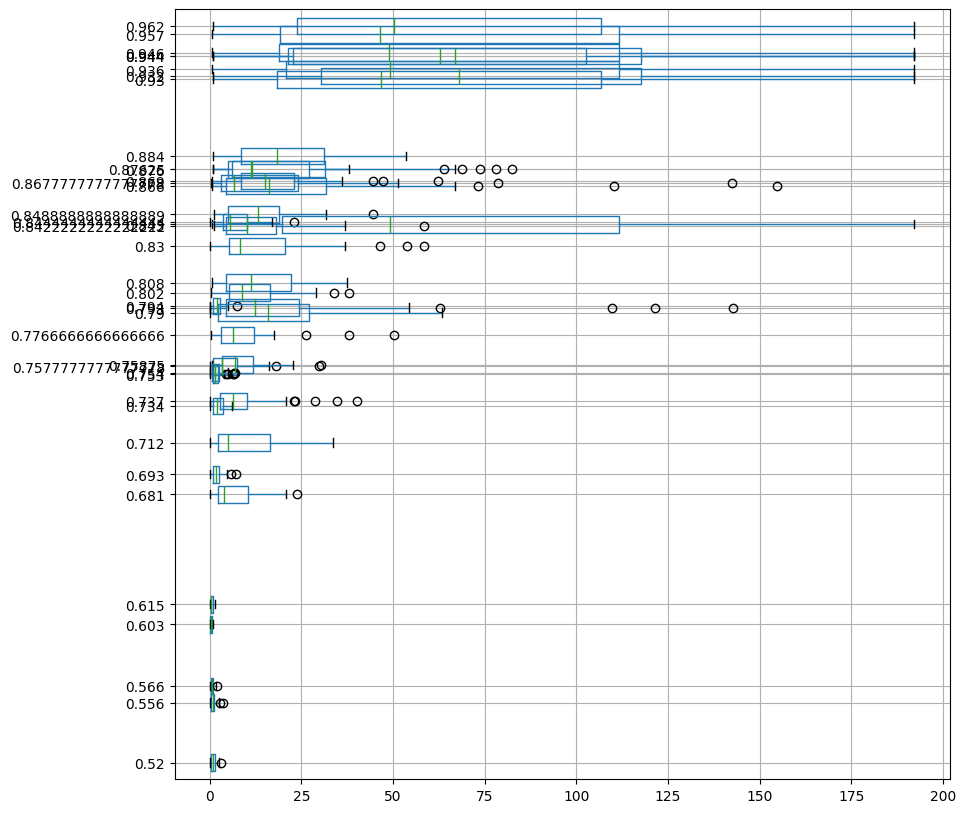

In [123]:
plt.figure(figsize = (10, 10))
pd.DataFrame(KL_data_all, index = df["Quantized Top1 Accuracy"]).T.boxplot(vert = False, positions = df["Quantized Top1 Accuracy"] * 50)

In [127]:
df["Classes Repeated"] = new_col
df

,Model Name,Dataset,Quantization Batch Size,Original Top1 Accuracy,Quantized Top1 Accuracy,Original Top5 Accuracy,Quantized Top5 Accuracy,Bits,MLP_Alphabet_Scalar,CNN_Alphabet_Scalar,...,Quantized Sparsity,Retain_rate,Fusion,Seed,Subset_Inds,Subset_Classes,Max_KL,Min_KL,Avg_KL,Classes Repeated
0,resnet50,CIFAR100,64,0.815000,0.603000,0.949000,0.917000,4,1.16,1.16,...,0.4454,0.25,False,0,"[7, 44, 77, 45, 79, 50, 51, 18, 26, 29]","[np.str_('beetle'), np.str_('lizard'), np.str_...",0.969446,0.091850,0.369210,False
1,resnet50,CIFAR100,64,0.828889,0.848889,0.967778,0.970000,4,1.16,1.16,...,0.4474,0.25,False,0,"[np.int64(44), np.int64(47), np.int64(64), np....","['lizard', 'maple_tree', 'possum', 'ray', 'ray...",44.511445,0.000000,12.637726,True
2,resnet50,CIFAR100,64,0.863000,0.843000,0.983000,0.989000,4,1.16,1.16,...,0.4504,0.25,False,0,"[0, 71, 39, 44, 49, 52, 53, 58, 61, 94]","['apple', 'sea', 'keyboard', 'lizard', 'mounta...",192.253176,0.544018,66.416617,False
3,resnet50,CIFAR100,64,0.799000,0.615000,0.951000,0.911000,4,1.16,1.16,...,0.4483,0.25,False,0,"[64, 65, 66, 3, 4, 38, 15, 80, 19, 63]","['possum', 'rabbit', 'raccoon', 'bear', 'beave...",1.338502,0.109146,0.578157,False
4,resnet50,CIFAR100,64,0.887000,0.944000,0.988000,0.995000,4,1.16,1.16,...,0.4543,0.25,False,0,"[0, 69, 39, 49, 52, 53, 20, 62, 58, 94]","['apple', 'rocket', 'keyboard', 'mountain', 'o...",192.253176,0.844140,69.558004,False
5,resnet50,CIFAR100,64,0.797000,0.830000,0.973000,0.974000,4,1.16,1.16,...,0.4480,0.25,False,0,"[np.int64(89), np.int64(73), np.int64(85), np....","['tractor', 'shark', 'tank', 'mouse', 'castle'...",58.464503,0.218817,14.820982,False
6,resnet50,CIFAR100,64,0.830000,0.737000,0.968000,0.955000,4,1.16,1.16,...,0.4464,0.25,False,0,"[np.int64(6), np.int64(18), np.int64(19), np.i...","['bee', 'caterpillar', 'cattle', 'woman', 'sha...",40.082360,0.155198,8.848314,False
7,resnet50,CIFAR100,64,0.794444,0.776667,0.966667,0.983333,4,1.16,1.16,...,0.4539,0.25,False,0,"[np.int64(59), np.int64(90), np.int64(69), np....","['pine_tree', 'train', 'rocket', 'table', 'mot...",50.340385,0.000000,8.589799,True
8,resnet50,CIFAR100,64,0.767000,0.693000,0.961000,0.975000,4,1.16,1.16,...,0.4510,0.25,False,0,"[96, 33, 68, 27, 72, 75, 47, 55, 56, 59]","['willow_tree', 'forest', 'road', 'crocodile',...",7.107001,0.074397,1.950773,False
9,resnet50,CIFAR100,64,0.867000,0.946000,0.986000,0.995000,4,1.16,1.16,...,0.4540,0.25,False,0,"[0, 58, 39, 71, 49, 52, 53, 26, 61, 94]","['apple', 'pickup_truck', 'keyboard', 'sea', '...",192.253176,0.544018,66.299283,False


In [128]:
df.to_csv("../logs/Quantization_Log_Subsets.csv", index = False)